In [1]:
import numpy as np
import pandas as pd
import warnings
import calendar
warnings.filterwarnings('ignore')

# import libraties
import matplotlib.pyplot as plt
import seaborn as sns
#Suppressing scientific notation to float only 
pd.options.display.float_format = '{:,.2f}'.format

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
#Import the Camera Accessory data set
cam_access=pd.read_csv('CameraAccessory.csv')
cam_access.head()

,Unnamed: 0,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,...,nan,-0.07,2.22,2.79,1.72,1.12,-0.44,-0.07,2.22,2.79
1,1,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,...,nan,2.47,3.08,3.26,-0.22,-0.79,-0.82,2.47,3.08,3.26
2,2,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,...,nan,0.18,0.23,-0.40,-0.73,-0.77,-0.71,0.18,0.23,-0.40
3,3,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,...,0.96,0.04,-0.49,-0.54,-0.15,0.09,1.26,0.04,-0.49,-0.54
4,4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,...,0.78,-0.51,-0.56,-0.56,0.29,1.66,1.66,-0.51,-0.56,-0.56


In [3]:
# Drop unnamed variable column
cam_access = cam_access.drop(['Unnamed: 0'], axis=1)
cam_access.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,COD,...,nan,-0.07,2.22,2.79,1.72,1.12,-0.44,-0.07,2.22,2.79
1,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,COD,...,nan,2.47,3.08,3.26,-0.22,-0.79,-0.82,2.47,3.08,3.26
2,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,COD,...,nan,0.18,0.23,-0.40,-0.73,-0.77,-0.71,0.18,0.23,-0.40
3,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,Prepaid,...,0.96,0.04,-0.49,-0.54,-0.15,0.09,1.26,0.04,-0.49,-0.54
4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,Prepaid,...,0.78,-0.51,-0.56,-0.56,0.29,1.66,1.66,-0.51,-0.56,-0.56


In [4]:
# Drop lag, MA and GMV columns
cam_access = cam_access.drop(['inc_LP_MA1','inc_LP_MA2','inc_LP_MA3','inc_PO_MA1','inc_PO_MA2','inc_PO_MA3','LP_lag_1_per',
           'LP_lag_2_per','LP_lag_3_per','PO_lag_1_per-1','PO_lag_1_per-2','PO_lag_1_per-1','GMV_lag_1_per','GMV_lag_2_per',
           'GMV_lag_3_per','PO_lag_1_per-3'], axis=1)
cam_access.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online Marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,COD,...,2015-10-17-10,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,COD,...,2015-10-19-10,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
2,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,COD,...,2015-10-20-10,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
3,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,Prepaid,...,2015-10-14-10,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,Prepaid,...,2015-10-17-10,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


In [5]:
# Drop unwanted variable columns
cam_access = cam_access.drop(['Year','Month','order_id','order_item_id','order_date','week_y','wday','week'], axis=1)
cam_access.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online Marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,"6,400.00",1,0,0,COD,5,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",...,2015-10-17-10,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,"6,900.00",1,0,0,COD,7,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",...,2015-10-19-10,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
2,"1,990.00",1,0,0,COD,10,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",...,2015-10-20-10,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
3,"1,690.00",1,0,0,Prepaid,4,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",...,2015-10-14-10,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
4,"1,618.00",1,0,0,Prepaid,6,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",...,2015-10-17-10,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


In [6]:
#Renaming column
cam_access.rename({' Affiliates':'Affiliates'},axis=1, inplace=True)

In [7]:
#check the dtypes
cam_access.dtypes

gmv                              float64
units                              int64
deliverybdays                      int64
deliverycdays                      int64
s1_fact_order_payment_type        object
sla                                int64
product_analytic_category         object
product_analytic_sub_category     object
product_analytic_vertical         object
product_mrp                      float64
product_procurement_sla            int64
Pay_Day                            int64
is_holiday                         int64
special_sale                      object
Discount_Percentage              float64
gmvperunit                       float64
delivery_on_time                 float64
delivery_status                   object
Total Investment                 float64
TV                               float64
Digital                          float64
Sponsorship                      float64
Content Marketing                float64
Online marketing                 float64
SEM             

In [8]:
#Check size
cam_access.shape

(196350, 42)

In [9]:
#Checking unique values in delivery time variable 
cam_access['delivery_on_time'].unique()

array([   5.,    7.,    1.,    3.,    0.,    2.,    4.,    9.,    6.,
          8.,   10.,   -1.,   -2.,   -4.,   -3.,   12.,   11.,   -5.,
         -9.,   -7.,   -6.,   -8.,   17.,  -10.,   13.,   18.,   16.,
         14.,   19.,  -15.,   15.,   20.,  -14.,  -17.,  -11.,  -13.,
         21.,  -18.,   24.,   22.,   25.,   37.,   23.,   32.,   26.,
         27.,   35.,   31.,  -12.,  -25.,  -16.,  -23.,  -19.,  -22.,
        -21.,  -24.,  -26.,  -20.,  -38.,  -36., -109.,  -37.,  -29.,
        -40.,  -31.,  -28.,  -27.,  -34.,  -39.,   39.,   34.,  -32.,
        -33.,  -43.,  -30., -136.])

In [10]:
#Delivery time can't be negative hence taking positive values
cam_access=cam_access.loc[(cam_access['delivery_on_time']>0)]
cam_access.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online Marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,"6,400.00",1,0,0,COD,5,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",...,2015-10-17-10,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,"6,900.00",1,0,0,COD,7,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",...,2015-10-19-10,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
2,"1,990.00",1,0,0,COD,10,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",...,2015-10-20-10,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
3,"1,690.00",1,0,0,Prepaid,4,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",...,2015-10-14-10,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
4,"1,618.00",1,0,0,Prepaid,6,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",...,2015-10-17-10,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


In [11]:
#Selecting numeric data
log_cols = cam_access.select_dtypes(['float64','int64']).columns

In [12]:
#checking detail info
cam_access.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122702 entries, 0 to 196349
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   gmv                            122702 non-null  float64
 1   units                          122702 non-null  int64  
 2   deliverybdays                  122702 non-null  int64  
 3   deliverycdays                  122702 non-null  int64  
 4   s1_fact_order_payment_type     122702 non-null  object 
 5   sla                            122702 non-null  int64  
 6   product_analytic_category      122702 non-null  object 
 7   product_analytic_sub_category  122702 non-null  object 
 8   product_analytic_vertical      122702 non-null  object 
 9   product_mrp                    122702 non-null  float64
 10  product_procurement_sla        122702 non-null  int64  
 11  Pay_Day                        122702 non-null  int64  
 12  is_holiday                    

In [13]:
#looking for Nan values
cam_access.isnull().sum()

gmv                                   0
units                                 0
deliverybdays                         0
deliverycdays                         0
s1_fact_order_payment_type            0
sla                                   0
product_analytic_category             0
product_analytic_sub_category         0
product_analytic_vertical             0
product_mrp                           0
product_procurement_sla               0
Pay_Day                               0
is_holiday                            0
special_sale                          0
Discount_Percentage                   0
gmvperunit                            0
delivery_on_time                      0
delivery_status                       0
Total Investment                      0
TV                                    0
Digital                               0
Sponsorship                           0
Content Marketing                     0
Online marketing                      0
SEM                                   0


In [14]:
cam_access['NPS'] = cam_access['NPS'].fillna(0)
cam_access['NPSScore'] = cam_access['NPSScore'].fillna(0)

In [15]:
#looking for Nan values
cam_access.isnull().sum()

gmv                              0
units                            0
deliverybdays                    0
deliverycdays                    0
s1_fact_order_payment_type       0
sla                              0
product_analytic_category        0
product_analytic_sub_category    0
product_analytic_vertical        0
product_mrp                      0
product_procurement_sla          0
Pay_Day                          0
is_holiday                       0
special_sale                     0
Discount_Percentage              0
gmvperunit                       0
delivery_on_time                 0
delivery_status                  0
Total Investment                 0
TV                               0
Digital                          0
Sponsorship                      0
Content Marketing                0
Online marketing                 0
SEM                              0
Radio                            0
Other                            0
Affiliates                       0
NPS                 

In [16]:
#checking log cols
log_cols = list(set(log_cols)-
                set(['gmv','units']))

In [17]:
# We will add 1 to all columns before we take log. This will make any value between 0 and 1 (like percentages) > 1
# This is done to avoid negatives in the columns as the log of numbers between 0 and 1 would be less than 

cam_access[log_cols]+=1

In [18]:
#Transforming relevant columns to logs
cam_access[log_cols] =np.log(cam_access[log_cols])

In [19]:
#checking dataframe now
cam_access.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online Marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,"6,400.00",1,0.00,0.00,COD,1.79,CameraAccessory,CameraAccessory,CameraTripod,8.88,...,2015-10-17-10,16.45,17.17,19.07,15.87,17.82,16.57,18.09,0.00,0.00
1,"6,900.00",1,0.00,0.00,COD,2.08,CameraAccessory,CameraAccessory,CameraTripod,8.88,...,2015-10-19-10,16.85,17.57,19.47,16.27,18.23,16.98,18.50,0.00,0.00
2,"1,990.00",1,0.00,0.00,COD,2.40,CameraAccessory,CameraAccessory,CameraTripod,7.65,...,2015-10-20-10,17.01,17.73,19.63,16.43,18.38,17.13,18.65,0.00,0.00
3,"1,690.00",1,0.00,0.00,Prepaid,1.61,CameraAccessory,CameraAccessory,CameraTripod,7.65,...,2015-10-14-10,17.07,17.79,19.70,16.50,18.45,17.20,18.72,0.00,0.00
4,"1,618.00",1,0.00,0.00,Prepaid,1.95,CameraAccessory,CameraAccessory,CameraTripod,7.65,...,2015-10-17-10,17.11,17.83,19.73,16.53,18.48,17.23,18.75,0.00,0.00


In [20]:
# Drop variable columns
cam_access = cam_access.drop(['month_date'], axis=1)
cam_access.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,ItemType,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online Marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,"6,400.00",1,0.00,0.00,COD,1.79,CameraAccessory,CameraAccessory,CameraTripod,8.88,...,Luxury,16.45,17.17,19.07,15.87,17.82,16.57,18.09,0.00,0.00
1,"6,900.00",1,0.00,0.00,COD,2.08,CameraAccessory,CameraAccessory,CameraTripod,8.88,...,Luxury,16.85,17.57,19.47,16.27,18.23,16.98,18.50,0.00,0.00
2,"1,990.00",1,0.00,0.00,COD,2.40,CameraAccessory,CameraAccessory,CameraTripod,7.65,...,MassMarket,17.01,17.73,19.63,16.43,18.38,17.13,18.65,0.00,0.00
3,"1,690.00",1,0.00,0.00,Prepaid,1.61,CameraAccessory,CameraAccessory,CameraTripod,7.65,...,MassMarket,17.07,17.79,19.70,16.50,18.45,17.20,18.72,0.00,0.00
4,"1,618.00",1,0.00,0.00,Prepaid,1.95,CameraAccessory,CameraAccessory,CameraTripod,7.65,...,MassMarket,17.11,17.83,19.73,16.53,18.48,17.23,18.75,0.00,0.00


In [21]:
# Subset all categorical variables
ecart_CA_numerical = cam_access.select_dtypes(include=['int64','float64'])
ecart_CA_numerical.head()

,gmv,units,deliverybdays,deliverycdays,sla,product_mrp,product_procurement_sla,Pay_Day,is_holiday,Discount_Percentage,...,holiday_count,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online Marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,"6,400.00",1,0.00,0.00,1.79,8.88,0.00,0.00,0.69,2.48,...,1.61,16.45,17.17,19.07,15.87,17.82,16.57,18.09,0.00,0.00
1,"6,900.00",1,0.00,0.00,2.08,8.88,0.00,0.00,0.00,1.62,...,0.00,16.85,17.57,19.47,16.27,18.23,16.98,18.50,0.00,0.00
2,"1,990.00",1,0.00,0.00,2.40,7.65,1.39,0.00,0.00,1.82,...,0.00,17.01,17.73,19.63,16.43,18.38,17.13,18.65,0.00,0.00
3,"1,690.00",1,0.00,0.00,1.61,7.65,1.39,0.00,0.00,3.02,...,1.61,17.07,17.79,19.70,16.50,18.45,17.20,18.72,0.00,0.00
4,"1,618.00",1,0.00,0.00,1.95,7.65,1.39,0.00,0.69,3.17,...,1.61,17.11,17.83,19.73,16.53,18.48,17.23,18.75,0.00,0.00


In [22]:
#checking detail info
ecart_CA_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122702 entries, 0 to 196349
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   gmv                        122702 non-null  float64
 1   units                      122702 non-null  int64  
 2   deliverybdays              122702 non-null  float64
 3   deliverycdays              122702 non-null  float64
 4   sla                        122702 non-null  float64
 5   product_mrp                122702 non-null  float64
 6   product_procurement_sla    122702 non-null  float64
 7   Pay_Day                    122702 non-null  float64
 8   is_holiday                 122702 non-null  float64
 9   Discount_Percentage        122702 non-null  float64
 10  gmvperunit                 122702 non-null  float64
 11  delivery_on_time           122702 non-null  float64
 12  Total Investment           122702 non-null  float64
 13  TV                         12

In [23]:
# Subset all categorical variables
ecart_CA_categorical = cam_access.select_dtypes(include=['object'])
ecart_CA_categorical.head()

,s1_fact_order_payment_type,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,special_sale,delivery_status,ItemType
0,COD,CameraAccessory,CameraAccessory,CameraTripod,Daussera,Early,Luxury
1,COD,CameraAccessory,CameraAccessory,CameraTripod,Regular Day,Early,Luxury
2,COD,CameraAccessory,CameraAccessory,CameraTripod,Regular Day,Early,MassMarket
3,Prepaid,CameraAccessory,CameraAccessory,CameraTripod,Regular Day,Early,MassMarket
4,Prepaid,CameraAccessory,CameraAccessory,CameraTripod,Daussera,Early,MassMarket


In [24]:
# Convert into dummies
ecart_CA_dummies = pd.get_dummies(ecart_CA_categorical, drop_first=True)
ecart_CA_dummies.head()

,s1_fact_order_payment_type_Prepaid,product_analytic_vertical_CameraAccessory,product_analytic_vertical_CameraBag,product_analytic_vertical_CameraBattery,product_analytic_vertical_CameraBatteryCharger,product_analytic_vertical_CameraBatteryGrip,product_analytic_vertical_CameraEyeCup,product_analytic_vertical_CameraFilmRolls,product_analytic_vertical_CameraHousing,product_analytic_vertical_CameraMicrophone,...,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Rakshabandhan,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [25]:
# Drop categorical variable columns
cam_access = cam_access.drop(list(ecart_CA_categorical.columns), axis=1)

In [26]:
#checking datframe now
cam_access.head()

,gmv,units,deliverybdays,deliverycdays,sla,product_mrp,product_procurement_sla,Pay_Day,is_holiday,Discount_Percentage,...,holiday_count,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online Marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,"6,400.00",1,0.00,0.00,1.79,8.88,0.00,0.00,0.69,2.48,...,1.61,16.45,17.17,19.07,15.87,17.82,16.57,18.09,0.00,0.00
1,"6,900.00",1,0.00,0.00,2.08,8.88,0.00,0.00,0.00,1.62,...,0.00,16.85,17.57,19.47,16.27,18.23,16.98,18.50,0.00,0.00
2,"1,990.00",1,0.00,0.00,2.40,7.65,1.39,0.00,0.00,1.82,...,0.00,17.01,17.73,19.63,16.43,18.38,17.13,18.65,0.00,0.00
3,"1,690.00",1,0.00,0.00,1.61,7.65,1.39,0.00,0.00,3.02,...,1.61,17.07,17.79,19.70,16.50,18.45,17.20,18.72,0.00,0.00
4,"1,618.00",1,0.00,0.00,1.95,7.65,1.39,0.00,0.69,3.17,...,1.61,17.11,17.83,19.73,16.53,18.48,17.23,18.75,0.00,0.00


In [27]:
# Concatenate dummy variables with X
ecart_CA = pd.concat([cam_access, ecart_CA_dummies], axis=1)
ecart_CA.head()

,gmv,units,deliverybdays,deliverycdays,sla,product_mrp,product_procurement_sla,Pay_Day,is_holiday,Discount_Percentage,...,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Rakshabandhan,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
0,"6,400.00",1,0.00,0.00,1.79,8.88,0.00,0.00,0.69,2.48,...,1,0,0,0,0,0,0,0,0,0
1,"6,900.00",1,0.00,0.00,2.08,8.88,0.00,0.00,0.00,1.62,...,0,0,0,0,0,0,1,0,0,0
2,"1,990.00",1,0.00,0.00,2.40,7.65,1.39,0.00,0.00,1.82,...,0,0,0,0,0,0,1,0,0,1
3,"1,690.00",1,0.00,0.00,1.61,7.65,1.39,0.00,0.00,3.02,...,0,0,0,0,0,0,1,0,0,1
4,"1,618.00",1,0.00,0.00,1.95,7.65,1.39,0.00,0.69,3.17,...,1,0,0,0,0,0,0,0,0,1


In [28]:
#checking detail info
ecart_CA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122702 entries, 0 to 196349
Data columns (total 69 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   gmv                                             122702 non-null  float64
 1   units                                           122702 non-null  int64  
 2   deliverybdays                                   122702 non-null  float64
 3   deliverycdays                                   122702 non-null  float64
 4   sla                                             122702 non-null  float64
 5   product_mrp                                     122702 non-null  float64
 6   product_procurement_sla                         122702 non-null  float64
 7   Pay_Day                                         122702 non-null  float64
 8   is_holiday                                      122702 non-null  float64
 9   Discount_Percentage       

In [29]:
#check size
ecart_CA.shape

(122702, 69)

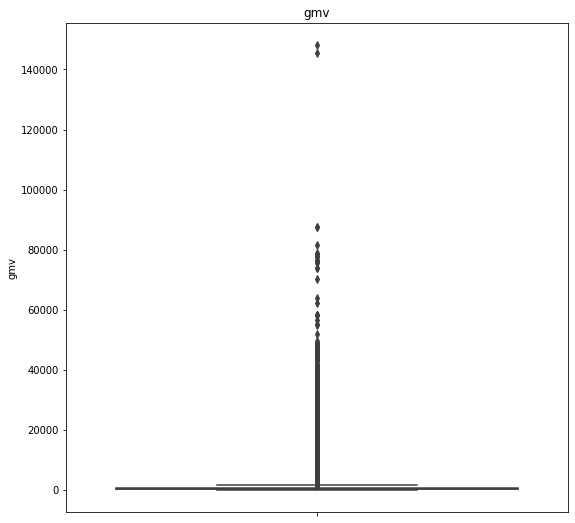

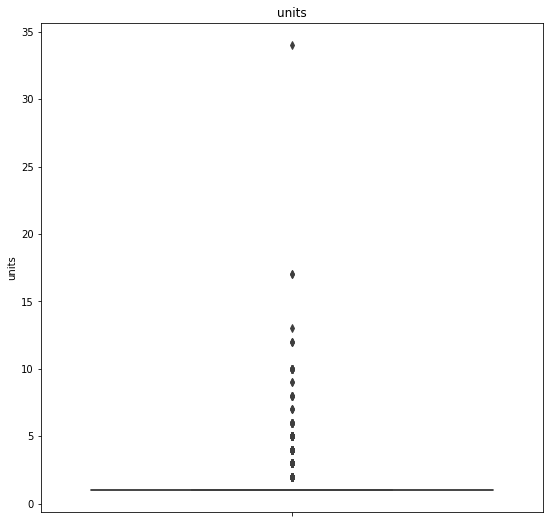

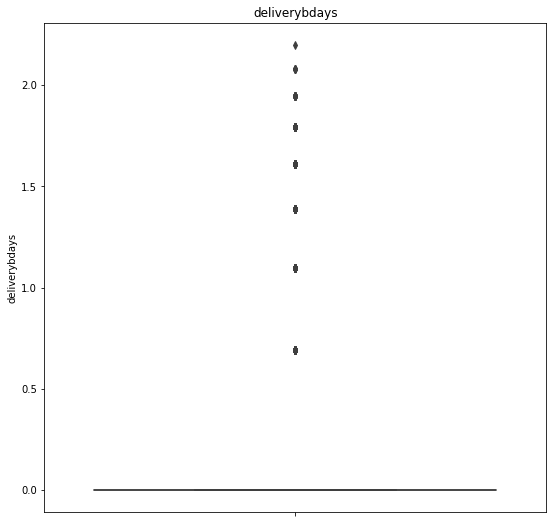

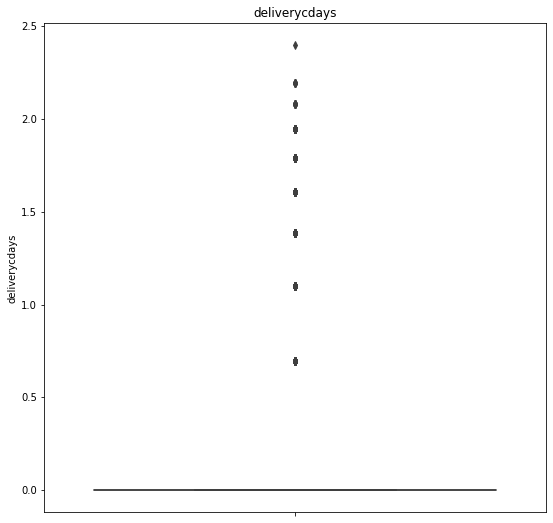

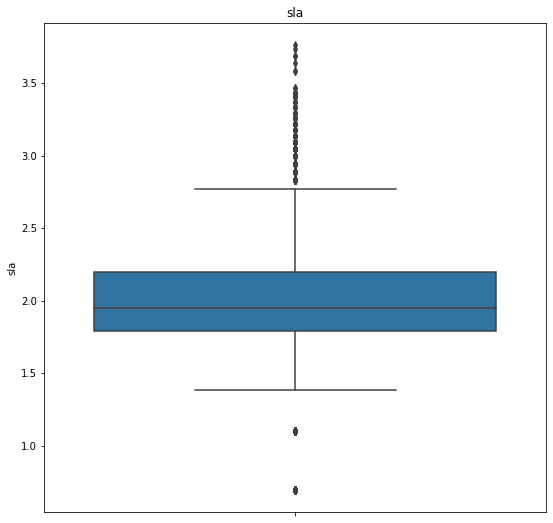

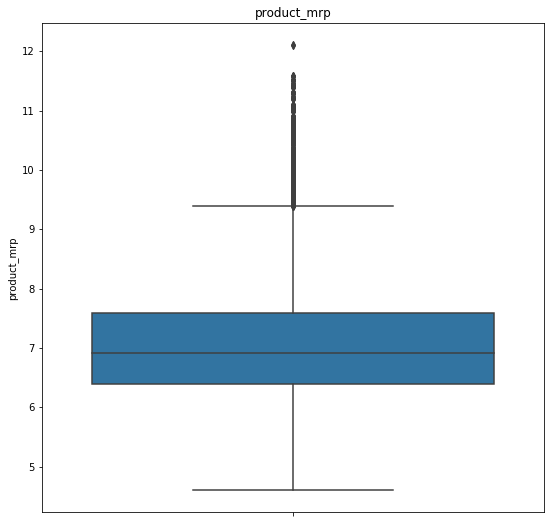

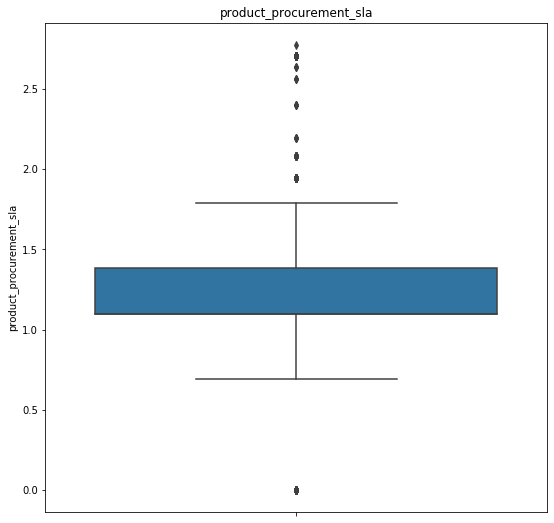

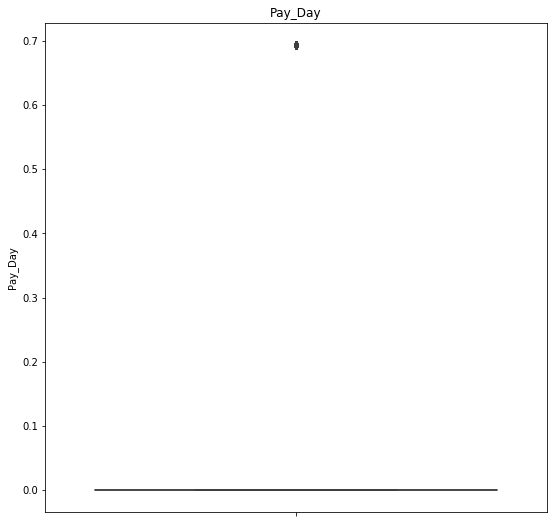

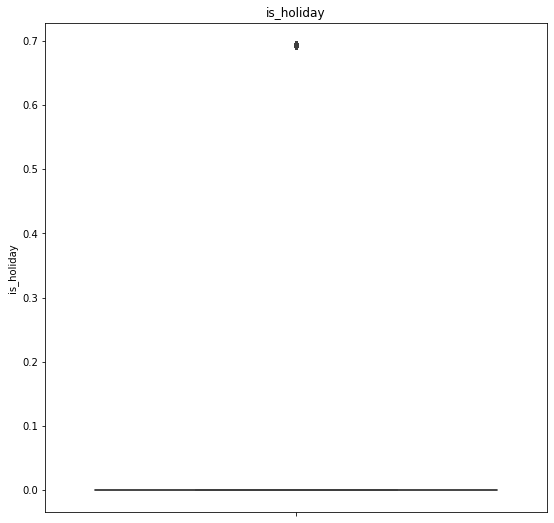

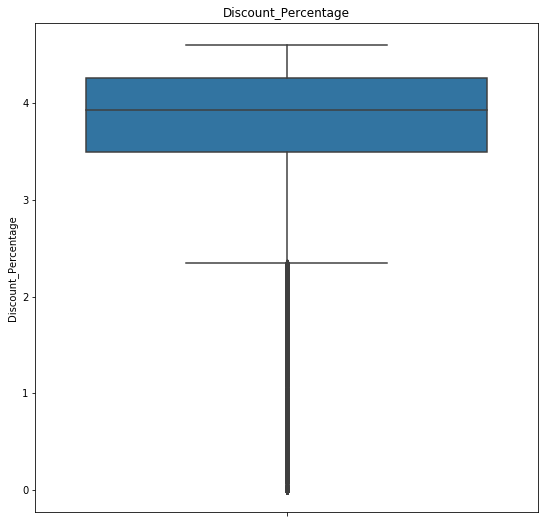

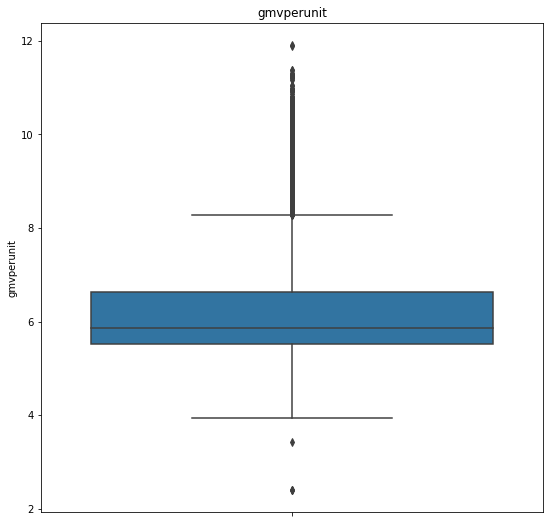

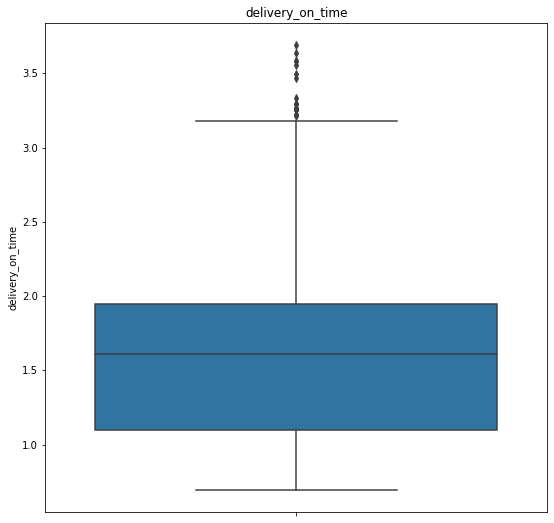

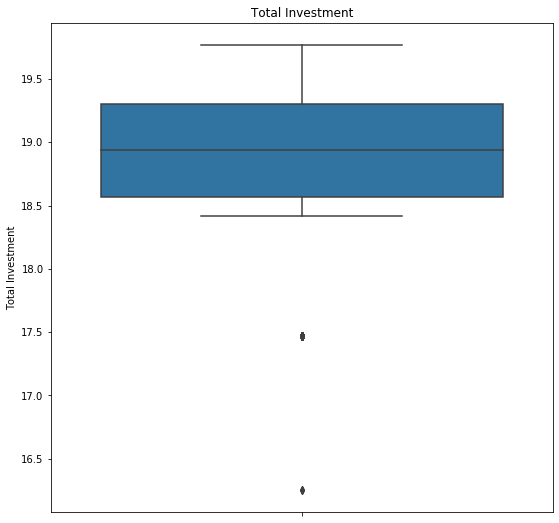

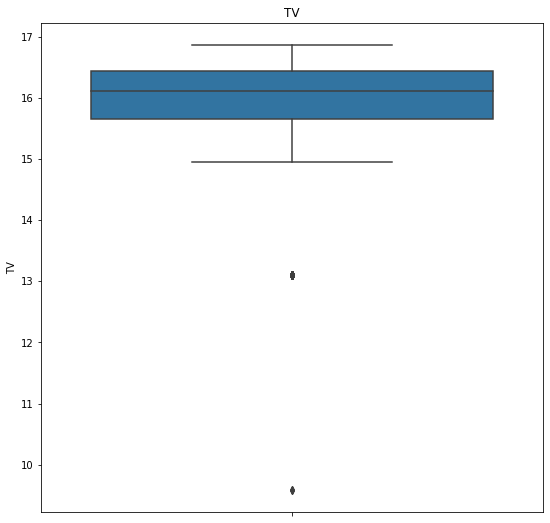

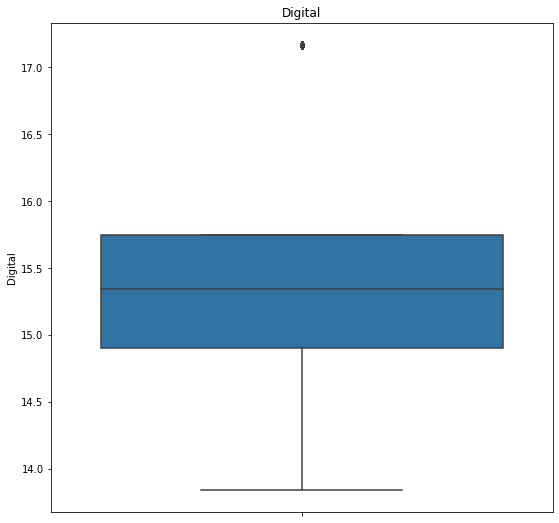

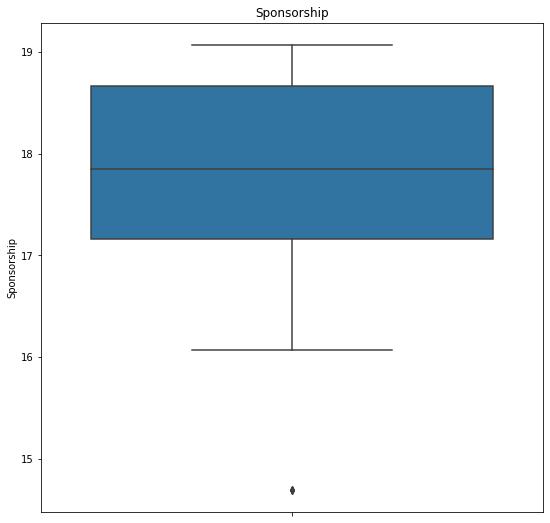

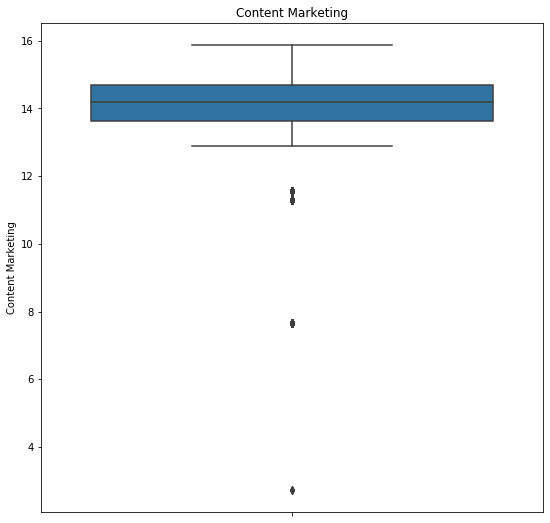

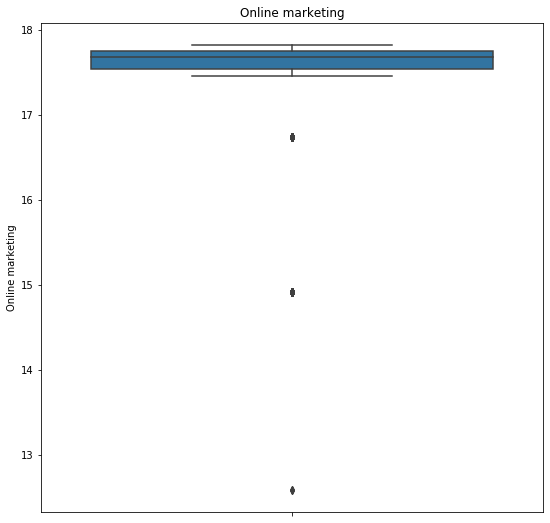

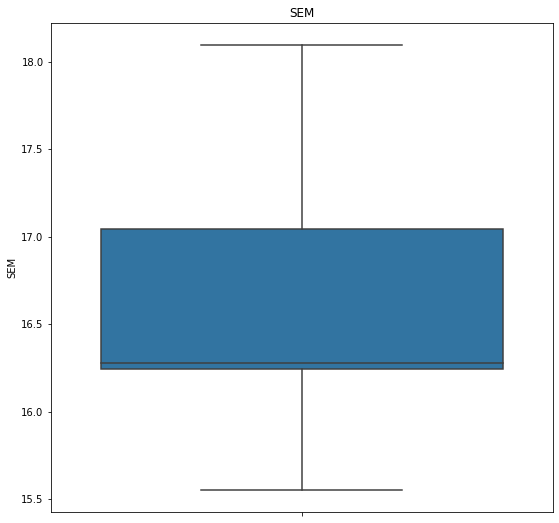

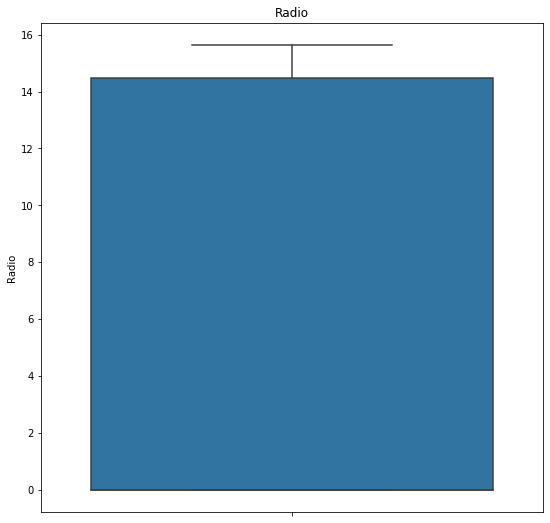

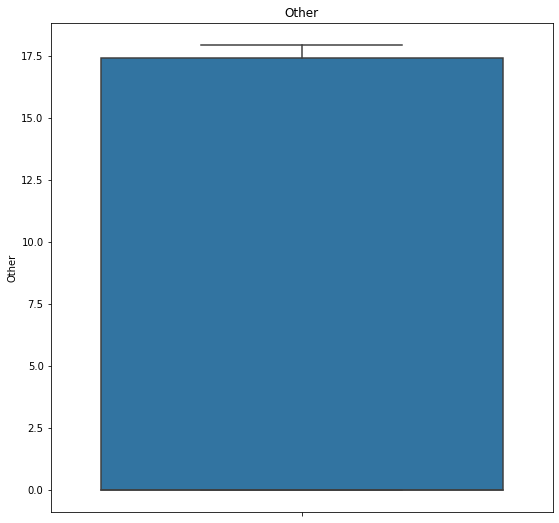

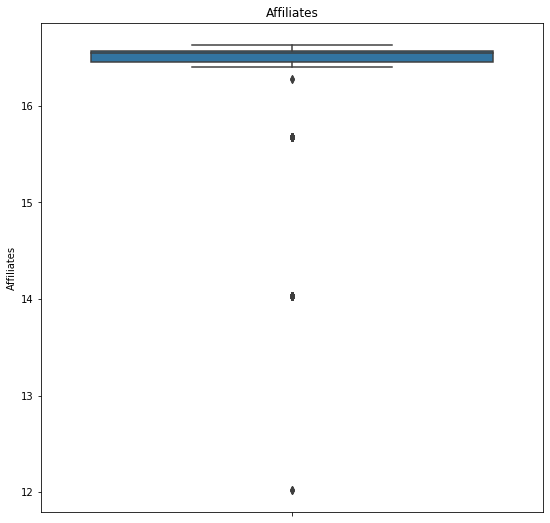

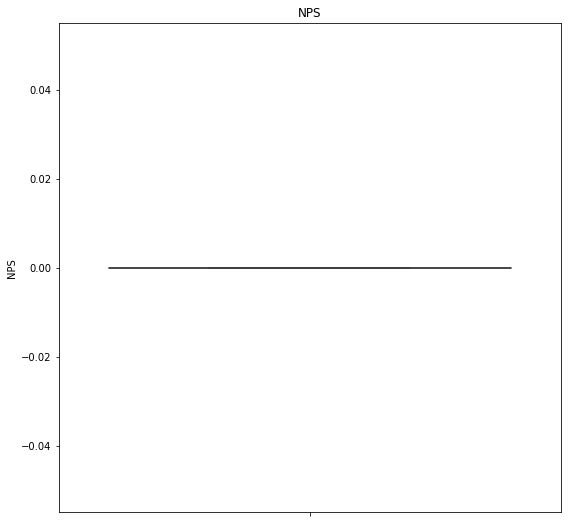

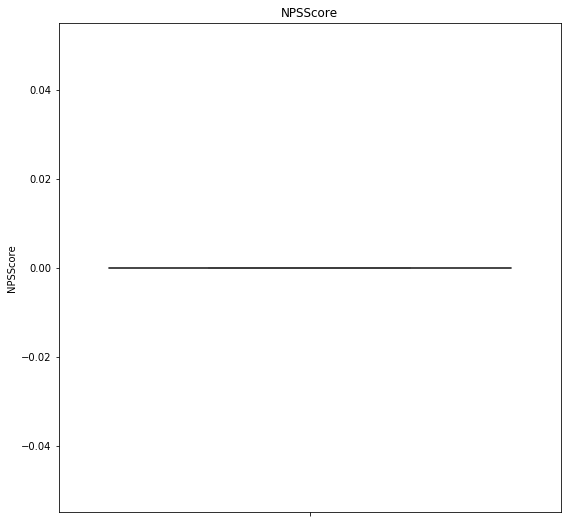

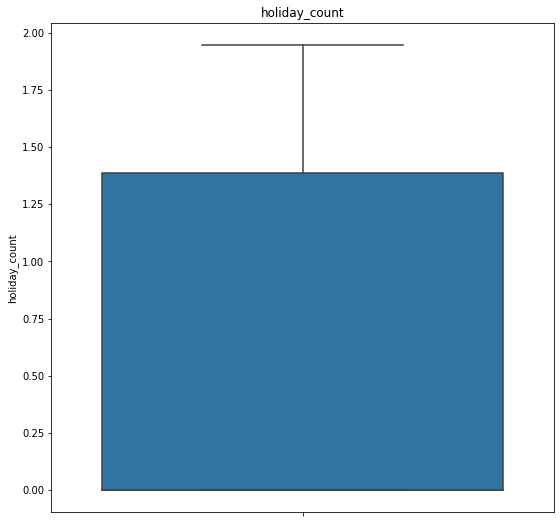

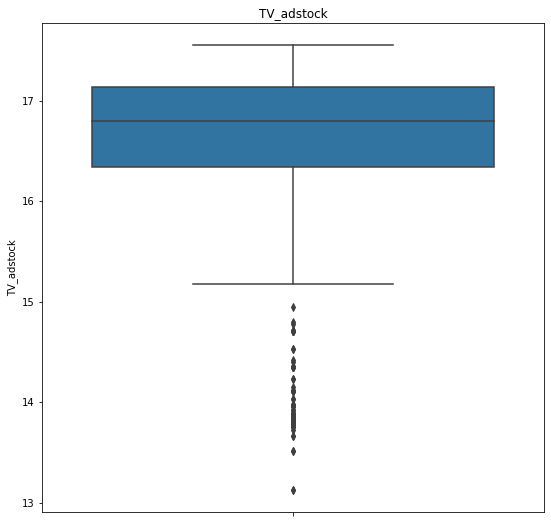

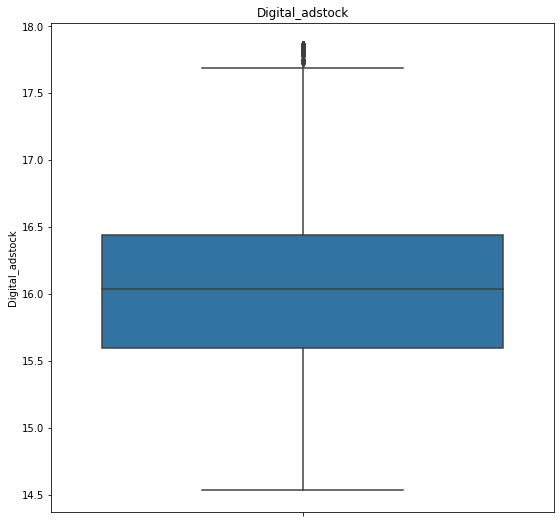

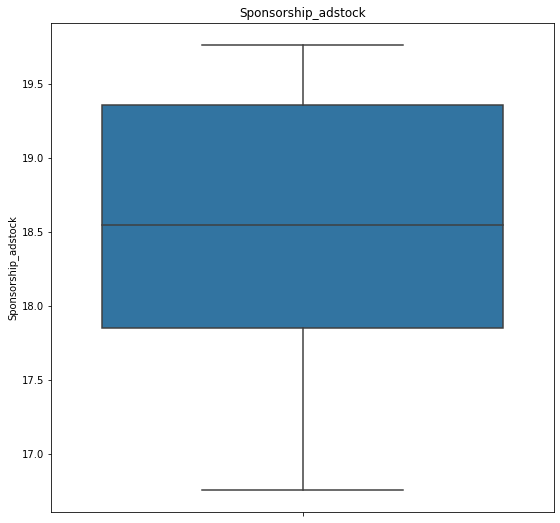

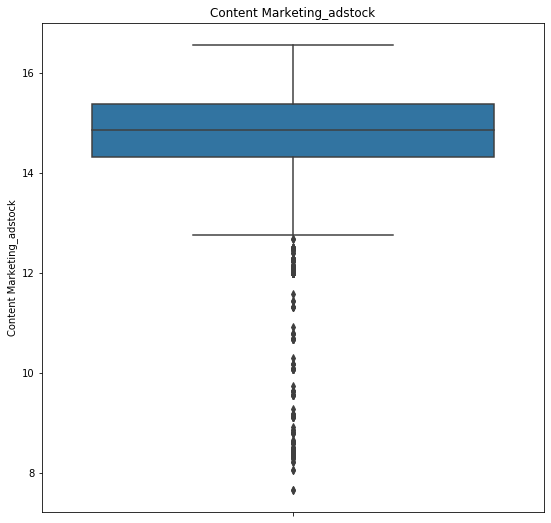

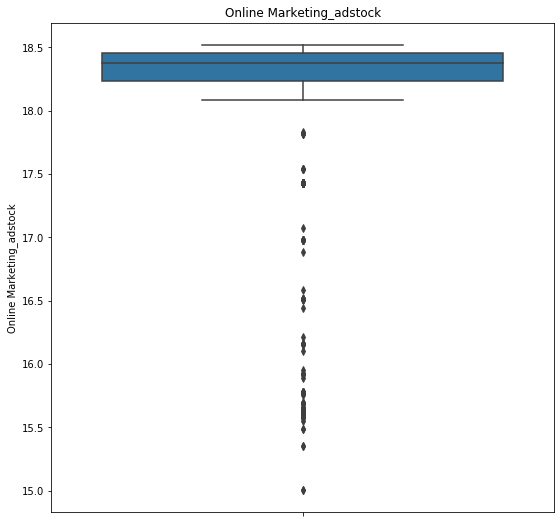

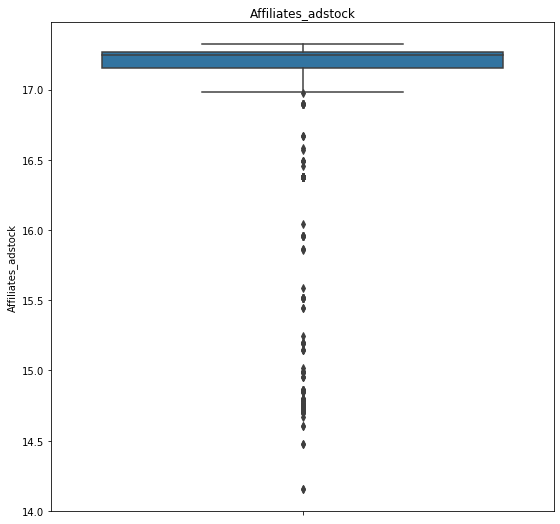

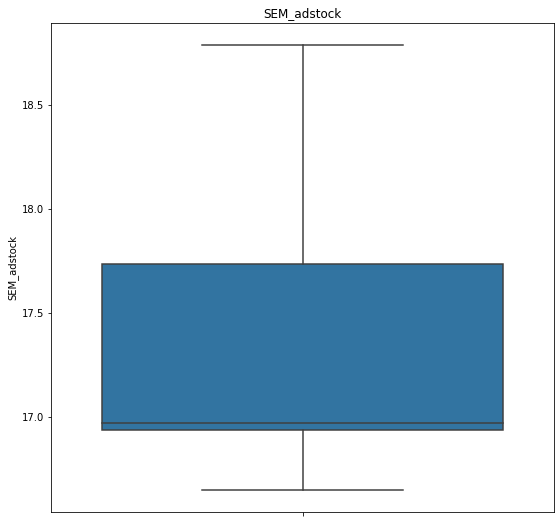

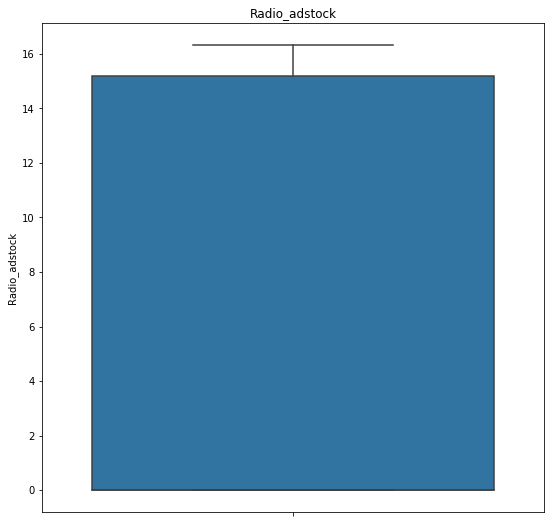

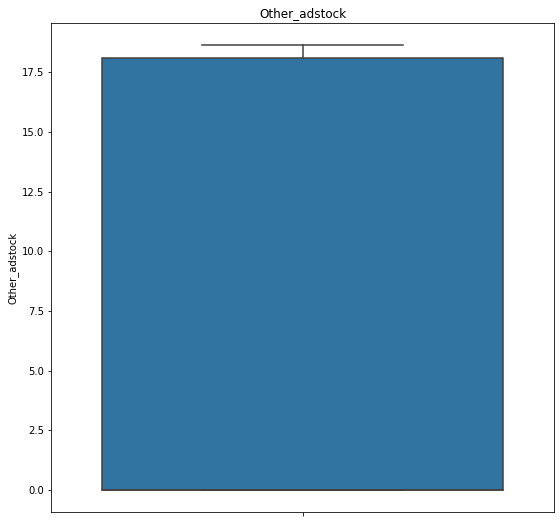

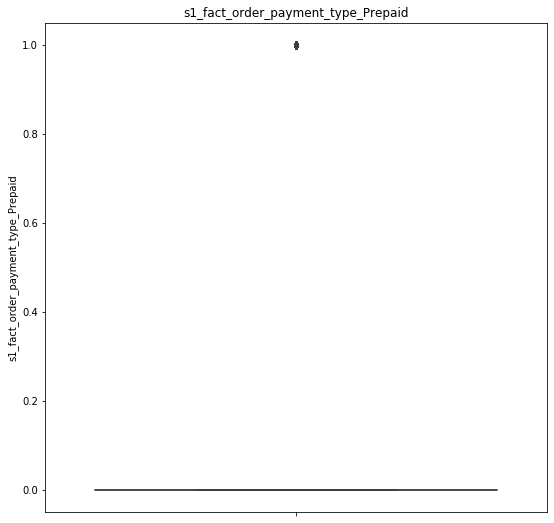

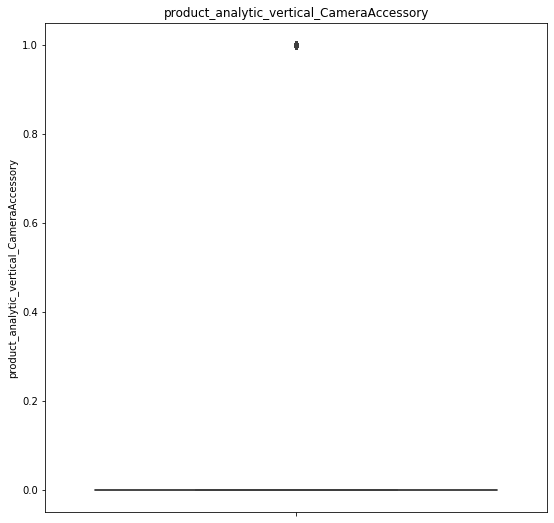

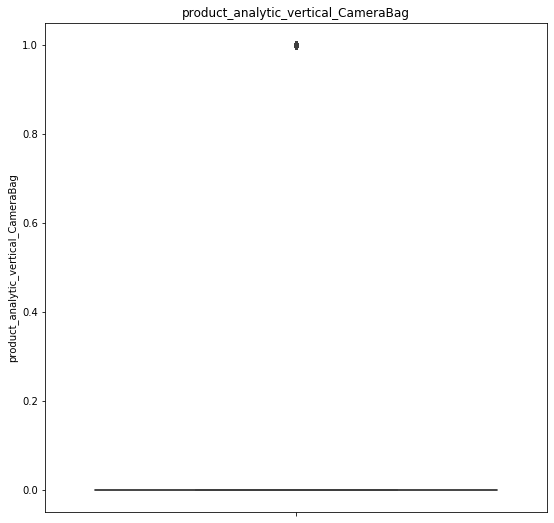

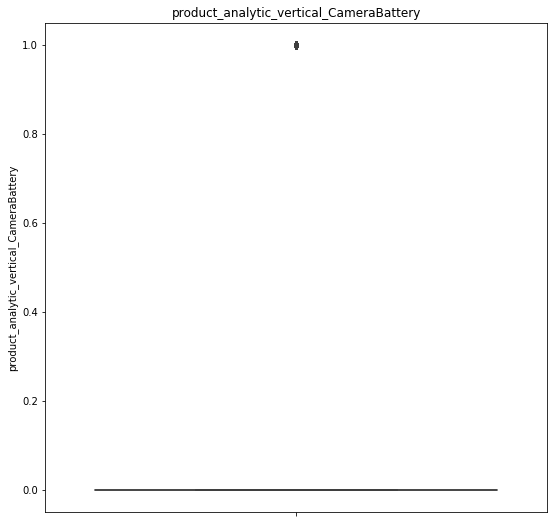

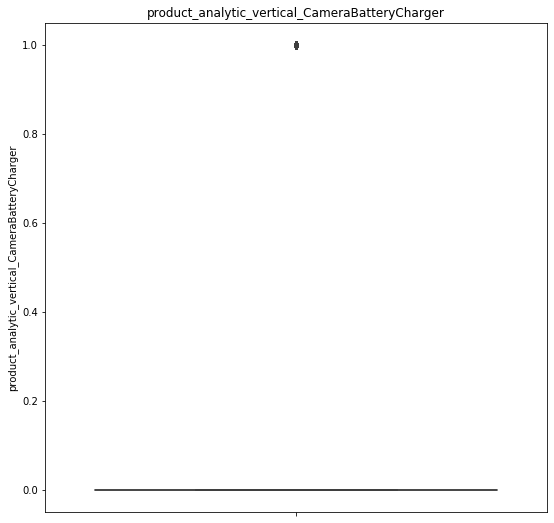

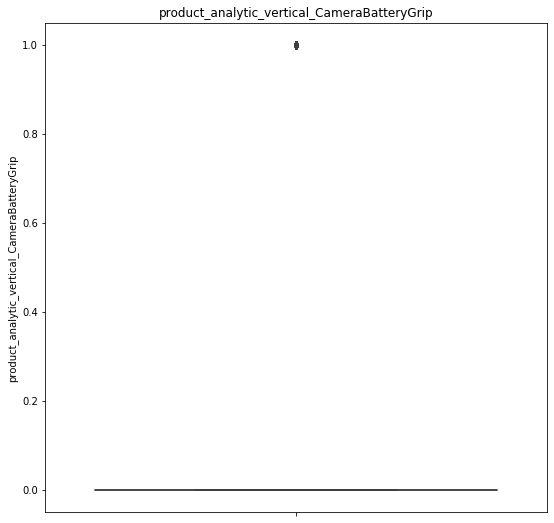

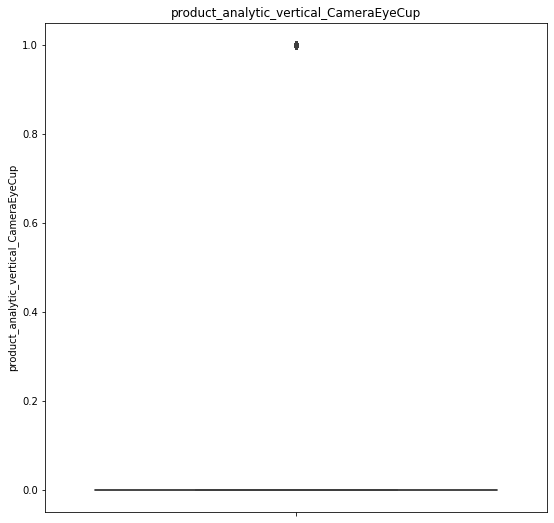

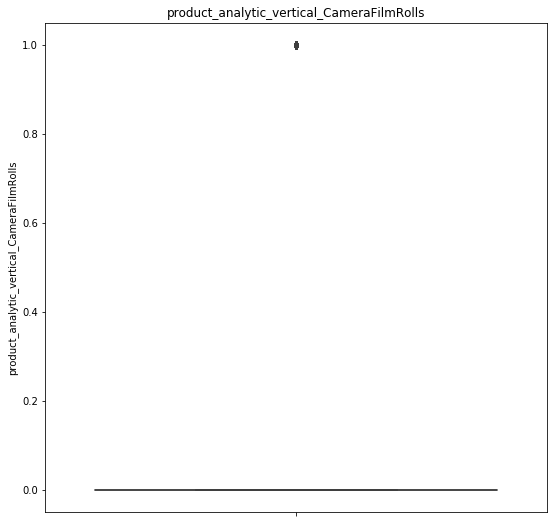

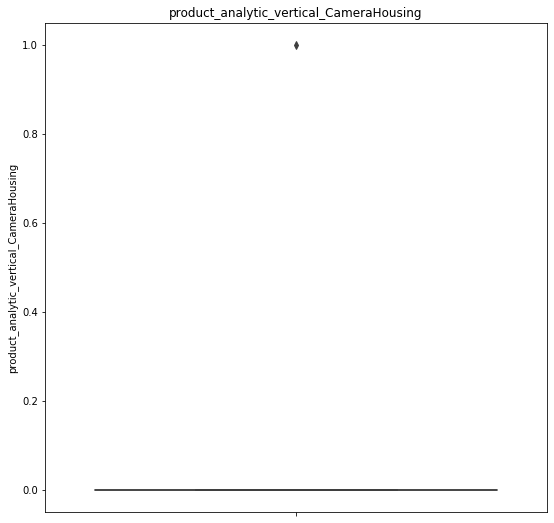

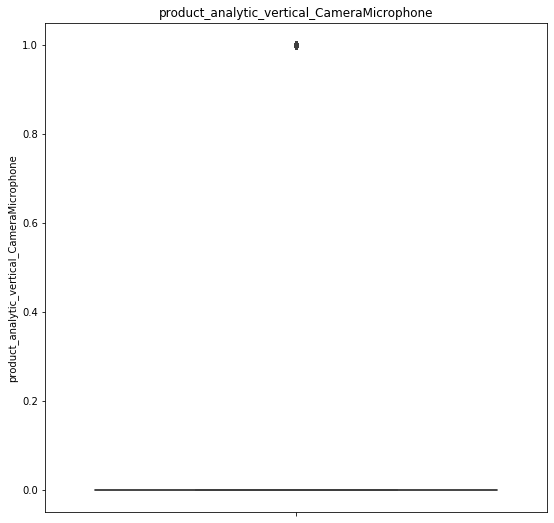

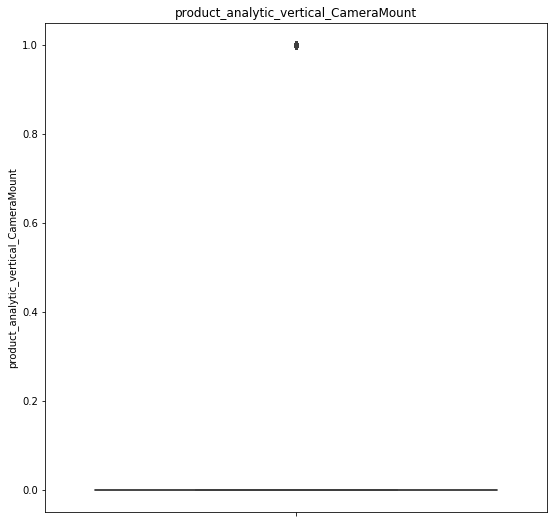

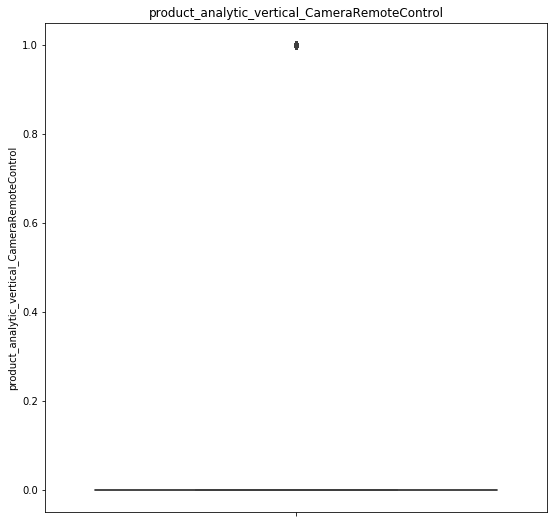

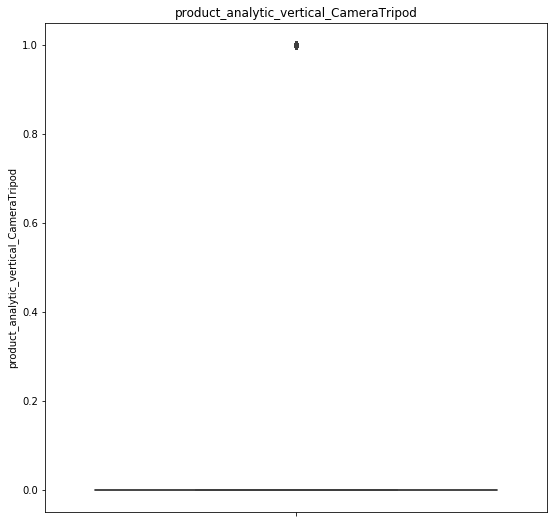

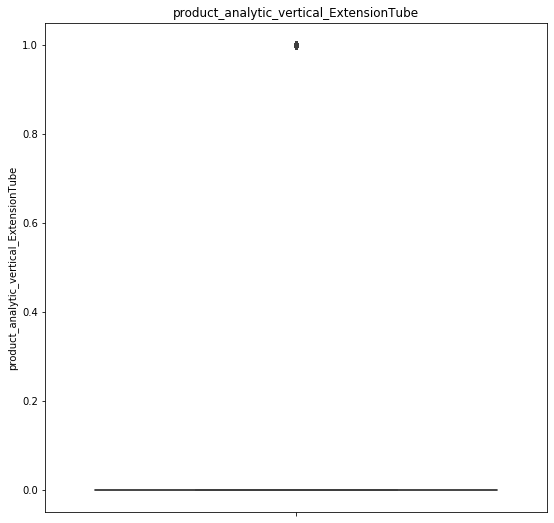

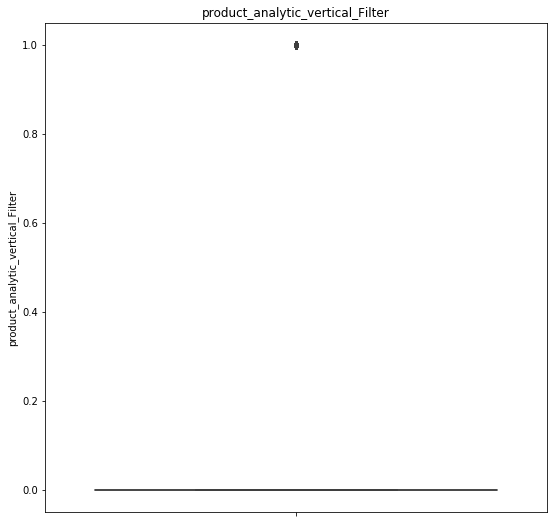

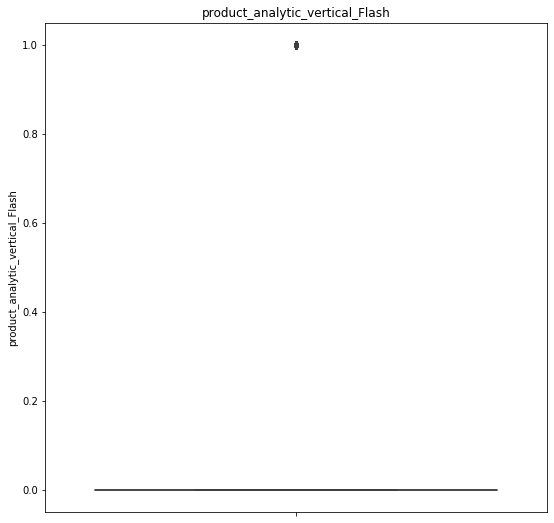

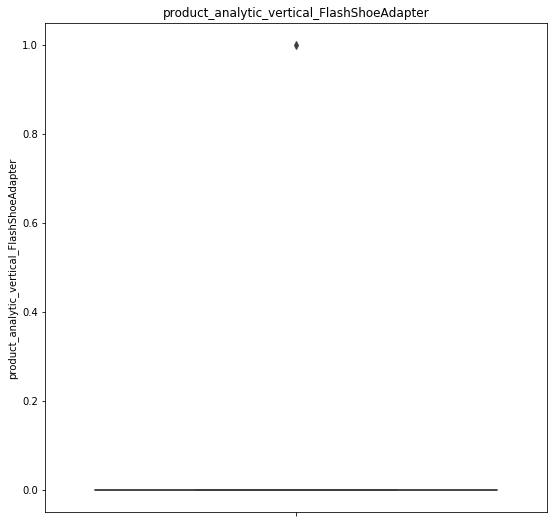

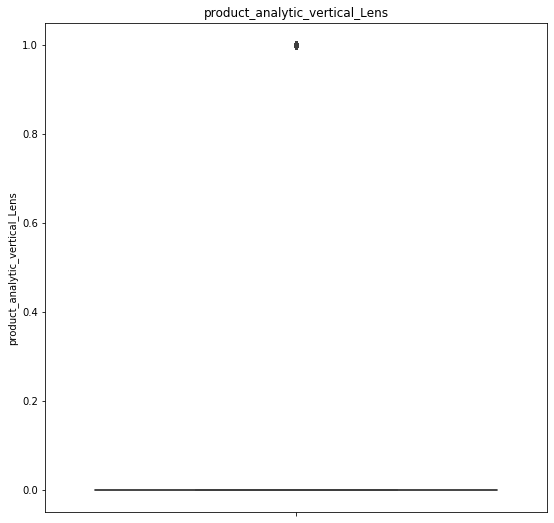

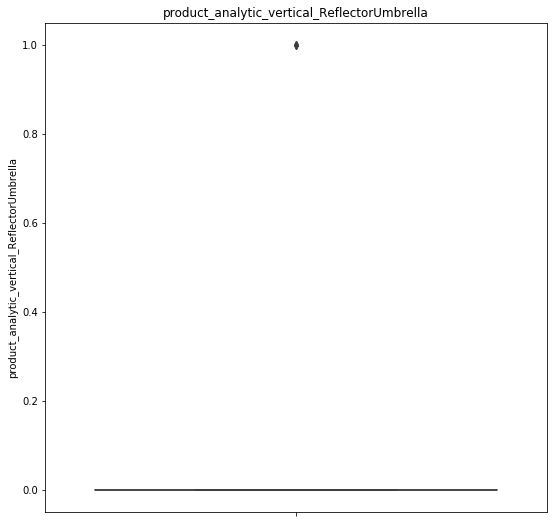

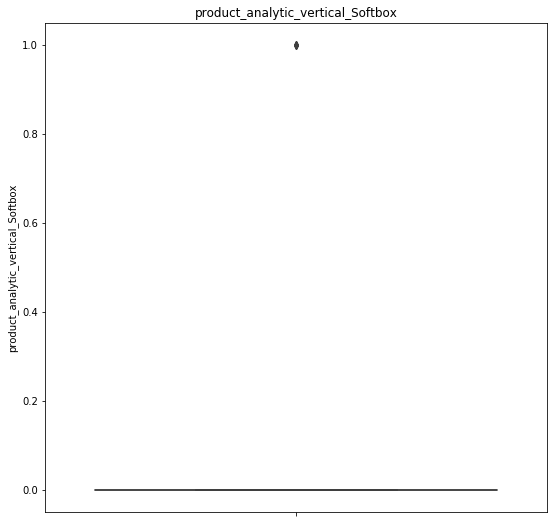

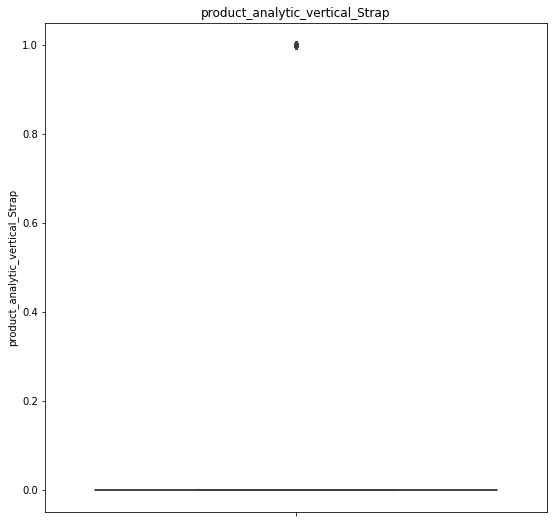

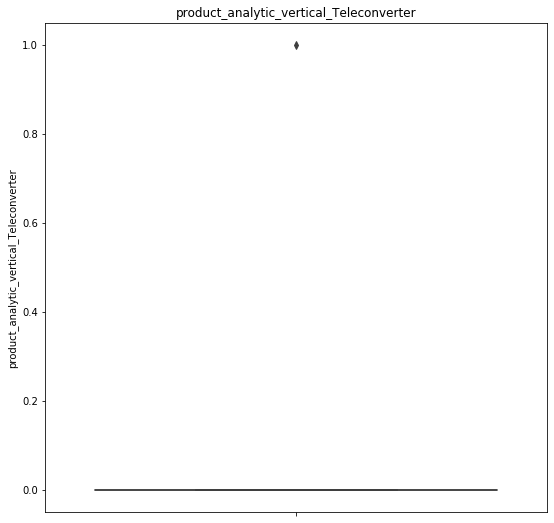

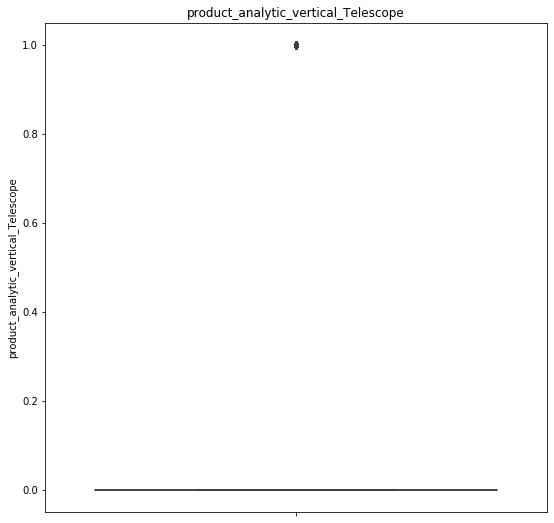

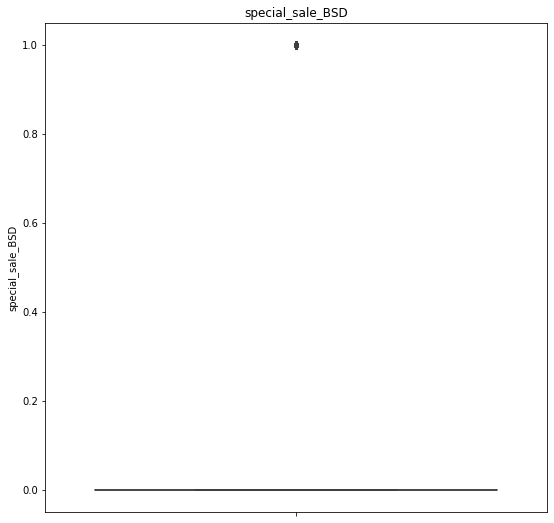

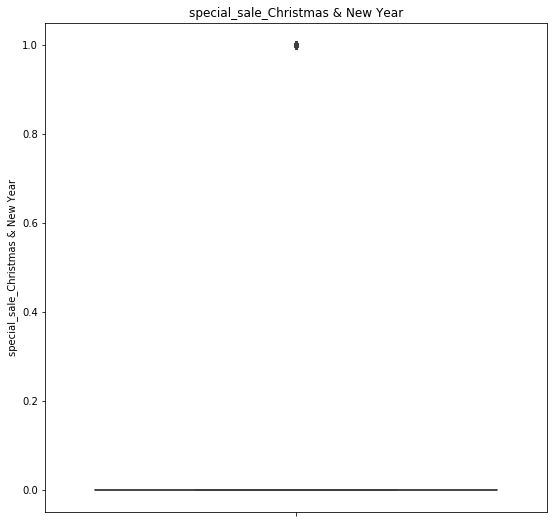

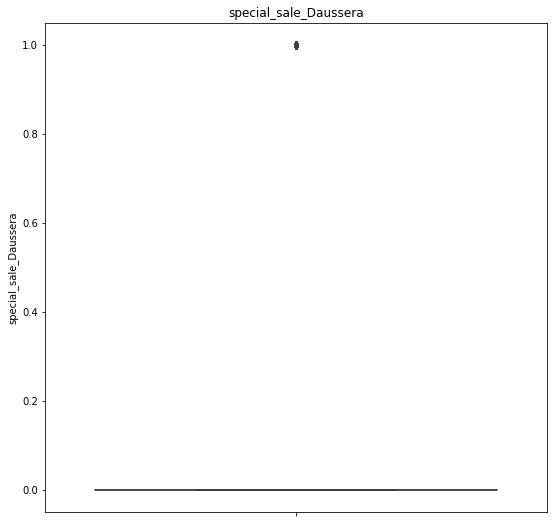

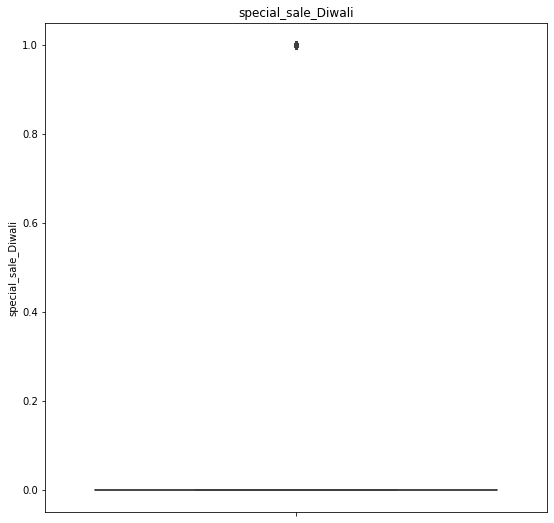

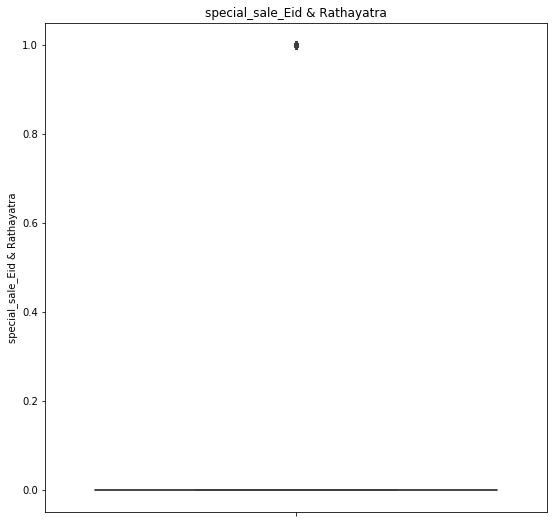

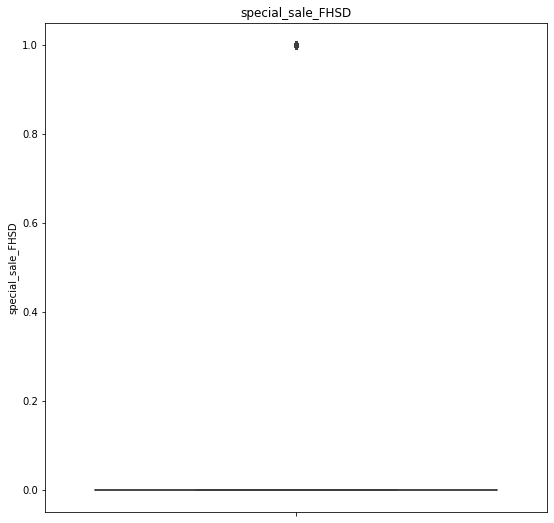

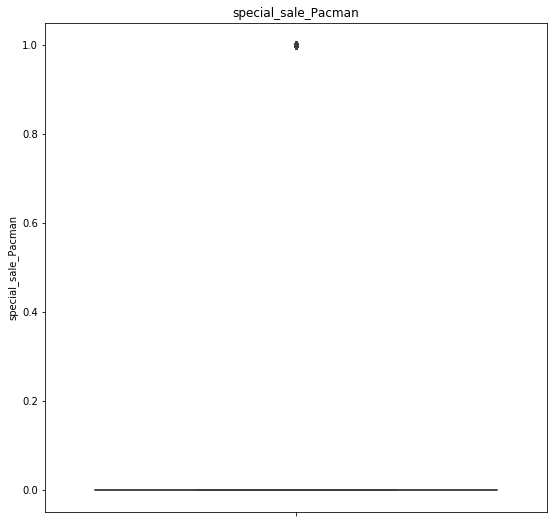

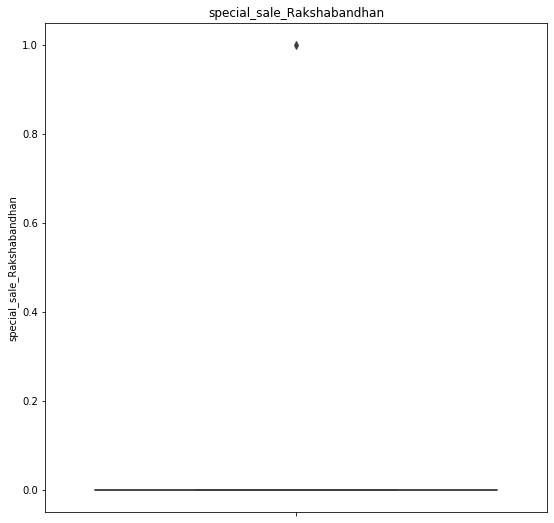

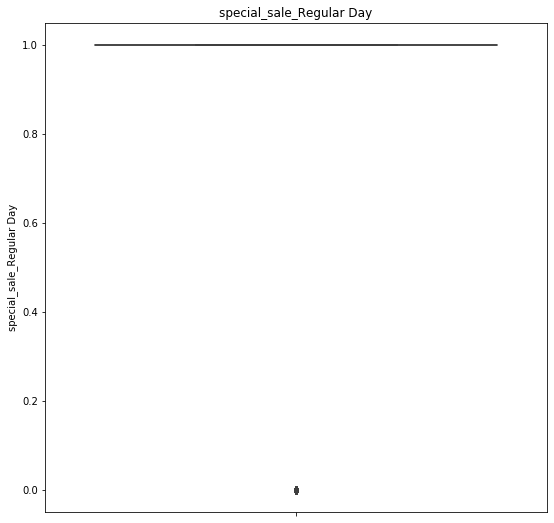

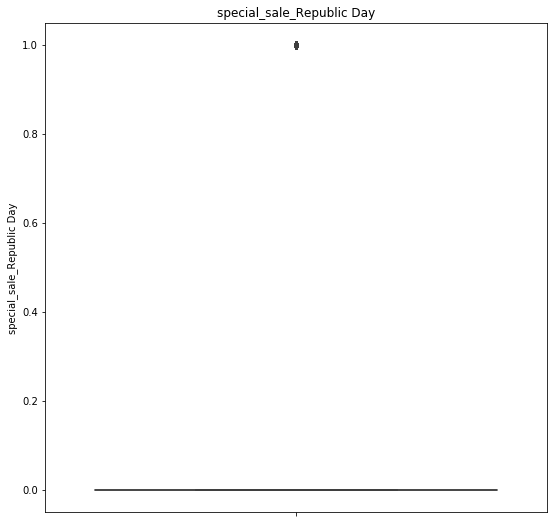

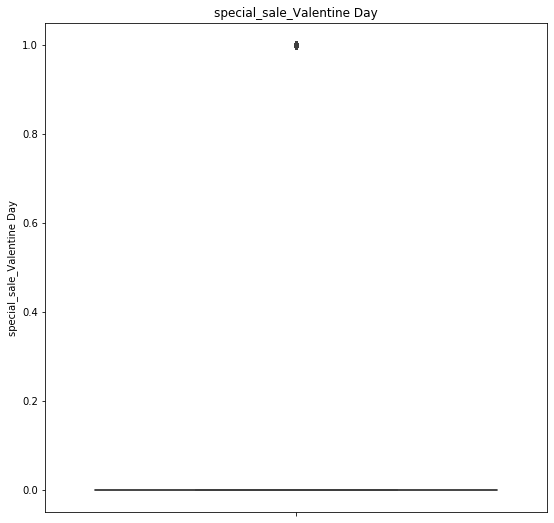

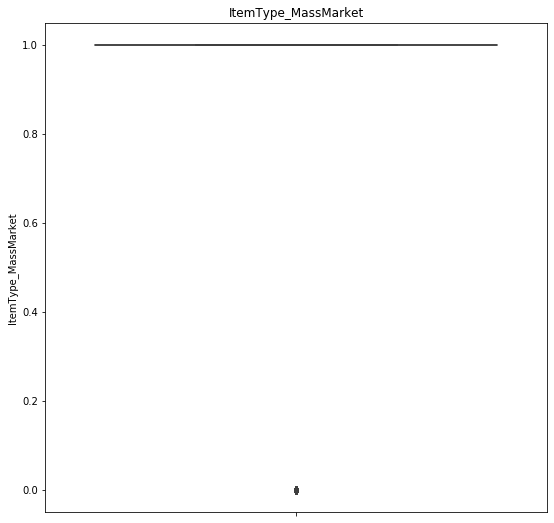

In [30]:
#Checking outliers in dataframe
for col in list(ecart_CA.columns):
    plt.figure(figsize=(9,9))
    sns.boxplot(data=ecart_CA, y=col).set_title(col)

In [31]:

#function for outlier treatment
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [32]:
#removing outliers
ecart_CA = remove_outlier(ecart_CA, 'gmv')
ecart_CA.shape

(109260, 69)

In [33]:
#removing outliers
ecart_CA = remove_outlier(ecart_CA, 'Discount_Percentage')
ecart_CA.shape

(103544, 69)

In [34]:
#removing outliers
ecart_CA = remove_outlier(ecart_CA, 'sla')
ecart_CA.shape

(101940, 69)

In [35]:
#removing outliers
ecart_CA = remove_outlier(ecart_CA, 'Affiliates')
ecart_CA.shape

(91976, 69)

In [36]:
# Import the required library

from sklearn.model_selection import train_test_split

In [37]:
#train-test split 
df_train, df_test = train_test_split(ecart_CA, train_size=0.7, test_size=0.3, random_state=100)

In [38]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
# Create a list of the variables that you need to scale
varlist = []
dum_cols = list(ecart_CA_dummies.columns)
dum_cols.append('Pay_Day')
dum_cols.append('is_holiday')

for col in ecart_CA.columns:
    if col not in dum_cols:
        varlist.append(col)

In [41]:
varlist

['gmv',
 'units',
 'deliverybdays',
 'deliverycdays',
 'sla',
 'product_mrp',
 'product_procurement_sla',
 'Discount_Percentage',
 'gmvperunit',
 'delivery_on_time',
 'Total Investment',
 'TV',
 'Digital',
 'Sponsorship',
 'Content Marketing',
 'Online marketing',
 'SEM',
 'Radio',
 'Other',
 'Affiliates',
 'NPS',
 'NPSScore',
 'holiday_count',
 'TV_adstock',
 'Digital_adstock',
 'Sponsorship_adstock',
 'Content Marketing_adstock',
 'Online Marketing_adstock',
 'Affiliates_adstock',
 'SEM_adstock',
 'Radio_adstock',
 'Other_adstock']

In [42]:
# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [43]:
# Let's take a look at the train dataframe now
df_train.head()

,gmv,units,deliverybdays,deliverycdays,sla,product_mrp,product_procurement_sla,Pay_Day,is_holiday,Discount_Percentage,...,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Rakshabandhan,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
38205,0.35,0.00,0.00,0.00,0.40,0.42,0.53,0.00,0.00,0.50,...,0,0,0,0,0,0,1,0,0,1
66016,0.28,0.00,0.00,0.00,0.40,0.38,0.68,0.00,0.00,0.54,...,0,0,0,0,0,0,1,0,0,1
102853,0.14,0.00,0.00,0.00,0.16,0.21,0.42,0.00,0.00,0.32,...,0,0,0,0,0,0,1,0,0,1
21214,0.70,0.00,0.00,0.00,0.40,0.58,0.26,0.00,0.00,0.63,...,0,0,0,0,0,0,1,0,0,1
27476,0.13,0.00,0.00,0.00,0.29,0.27,0.53,0.00,0.69,0.66,...,0,1,0,0,0,0,0,0,0,1


In [44]:
# Split the train dataset into X and y

y_train = df_train.pop('gmv')
X_train = df_train

In [45]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [46]:
#Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 9.40010497e-01  3.41127023e-04 -2.58424704e-02  2.16437422e-02
  5.75406355e-02 -5.46565571e-02 -7.85653987e-03 -9.00371940e-03
  2.07566810e-02  1.60661529e+00 -2.48981018e-02  2.62516816e+10
 -8.90145328e+09  2.68344919e+10 -4.73784204e+09 -2.76297087e+10
  1.10944385e+10 -3.19688769e+10  3.02474091e+10 -3.15813260e+10
  7.69338895e+09 -3.74642772e+08  1.31182276e+08  3.10260992e-03
 -5.97894627e-02 -1.21751253e-01 -7.69470079e-03  2.76883654e-02
 -4.00808160e-01  3.10954283e-01  1.45513744e-01  6.25633595e-02
 -5.89685478e-02 -1.07459959e-03  2.75192832e-02  5.44301856e-02
  4.19777762e-03  1.18916871e-02 -1.93799780e+08  1.47985799e-02
  4.69726515e-02 -1.67563169e+08  4.78805957e-02 -2.22574442e-04
 -2.33341350e-02 -1.75268082e-02 -5.40111266e-03  7.95930514e-03
 -9.91129525e-03  1.23920877e-02  3.74362337e-03 -9.64479250e-03
  1.39271244e-02  3.94042938e-03  1.95605977e+06 -6.91982212e-05
  4.60176044e-03 -4.98625252e-03  3.46516755e-02 -6.62205872e-03
  0.00000000e+00 -6.97939

In [48]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 12 features
lm = LinearRegression()
rfe1 = RFE(lm, 12)

# Fit with 12 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)

[ True False False False False False False False False  True False  True
  True  True  True  True  True  True  True  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]
[ 1 49 22 21 12 16 34 38 26  1 20  1  1  1  1  1  1  1  1  1  1  5  7 46
 13  4 28 18 10  9  6  2  3 48 17  8 41 33 24 31 15 29 11 52 19 23 30 37
 27 36 42 25 32 40 50 53 35 44 14 43 55 51 47 56 39 45 54 57]


In [49]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 12 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,units,gmvperunit,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,SEM,Radio,Other,Affiliates
38205,1.00,0.00,0.79,0.02,0.60,0.32,0.42,0.35,0.48,0.12,0.00,0.00,0.65
66016,1.00,0.00,0.74,0.31,0.61,0.00,0.00,0.71,0.83,0.00,1.00,1.00,1.00
102853,1.00,0.00,0.61,0.56,1.00,0.46,0.76,0.51,0.22,0.10,0.93,0.97,0.25
21214,1.00,0.00,0.93,1.00,0.78,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.75
27476,1.00,0.00,0.60,0.02,0.60,0.32,0.42,0.35,0.48,0.12,0.00,0.00,0.65


In [50]:
# Fitting the model with 12 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 5.751e+04
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:41:13   Log-Likelihood:                 87529.
No. Observations:               64383   AIC:                        -1.750e+05
Df Residuals:                   64372   BIC:                        -1.749e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -7.602e+09   5.37e+0

In [51]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Total Investment,"5,862,642.27"
11,Other,"1,375,684.86"
5,Digital,"282,479.12"
6,Sponsorship,"260,161.83"
7,Content Marketing,"146,505.77"
10,Radio,"19,050.11"
8,Online marketing,"1,497.91"
9,SEM,240.30
12,Affiliates,63.56
4,TV,14.56


In [53]:
#drop 1st variable with high vif and p-value
X_train_rfe1.drop('Total Investment', axis = 1, inplace = True)

In [54]:
# Refitting with 11 variables
X_train_rfe2 = sm.add_constant(X_train_rfe1)

# Fitting the model with 11 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 6.784e+04
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:41:28   Log-Likelihood:                 92350.
No. Observations:               64383   AIC:                        -1.847e+05
Df Residuals:                   64372   BIC:                        -1.846e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5.158e+08   5.36e+0

In [55]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Radio,"178,693,526.17"
10,Other,"1,877,819.59"
3,TV,"1,765,704.46"
4,Digital,"1,151,196.61"
5,Sponsorship,"926,862.24"
6,Content Marketing,"396,713.34"
8,SEM,"279,348.65"
11,Affiliates,"78,074.79"
7,Online marketing,"21,160.02"
2,gmvperunit,1.04


In [56]:
#drop 1st variable with high vif and p-value
X_train_rfe2.drop('Radio', axis = 1, inplace = True)

In [57]:
# Refitting with 11 variables
X_train_rfe3 = sm.add_constant(X_train_rfe2)

# Fitting the model with 11 variables
lm3 = sm.OLS(y_train, X_train_rfe3).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 7.417e+04
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:41:34   Log-Likelihood:                 91871.
No. Observations:               64383   AIC:                        -1.837e+05
Df Residuals:                   64373   BIC:                        -1.836e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8.365e+09   6.04e+0

In [58]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,TV,inf
4,Digital,inf
5,Sponsorship,inf
6,Content Marketing,inf
7,Online marketing,inf
8,SEM,inf
9,Other,inf
10,Affiliates,inf
2,gmvperunit,1.04
1,units,1.00


In [59]:
#drop 1st variable with high vif and p-value
X_train_rfe3.drop('TV', axis = 1, inplace = True)

In [60]:
# Refitting with 11 variables
X_train_rfe4 = sm.add_constant(X_train_rfe3)

# Fitting the model with 11 variables
lm4 = sm.OLS(y_train, X_train_rfe4).fit()   
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 7.539e+04
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:41:40   Log-Likelihood:                 92350.
No. Observations:               64383   AIC:                        -1.847e+05
Df Residuals:                   64373   BIC:                        -1.846e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.8628      0.00

In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,172.64
6,Online marketing,88.31
3,Digital,71.83
5,Content Marketing,56.97
7,SEM,41.17
9,Affiliates,34.48
4,Sponsorship,20.19
8,Other,10.91
2,gmvperunit,1.04
1,units,1.00


In [62]:
#drop 1st variable with high vif and p-value
X_train_rfe4.drop('Online marketing', axis = 1, inplace = True)

In [63]:
# Refitting with 11 variables
X_train_rfe5 = sm.add_constant(X_train_rfe4)

# Fitting the model with 11 variables
lm5 = sm.OLS(y_train, X_train_rfe5).fit()   
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 8.396e+04
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:41:52   Log-Likelihood:                 92056.
No. Observations:               64383   AIC:                        -1.841e+05
Df Residuals:                   64374   BIC:                        -1.840e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.8476      0.00

In [64]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,165.08
8,Affiliates,23.90
5,Content Marketing,21.31
3,Digital,18.30
4,Sponsorship,17.57
6,SEM,15.45
7,Other,5.31
2,gmvperunit,1.03
1,units,1.00


In [65]:
#drop 1st variable with high vif and p-value
X_train_rfe5.drop('Affiliates', axis = 1, inplace = True)

In [66]:
# Refitting with 11 variables
X_train_rfe6 = sm.add_constant(X_train_rfe5)

# Fitting the model with 11 variables
lm6 = sm.OLS(y_train, X_train_rfe6).fit()   
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 9.557e+04
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:41:56   Log-Likelihood:                 91937.
No. Observations:               64383   AIC:                        -1.839e+05
Df Residuals:                   64375   BIC:                        -1.838e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.8818      0.00

In [67]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,71.06
6,SEM,10.80
3,Digital,10.60
4,Sponsorship,7.06
5,Content Marketing,5.33
7,Other,2.63
2,gmvperunit,1.01
1,units,1.00


In [68]:
y_train_price = lm6.predict(X_train_rfe6)

Text(0.5, 0, 'Errors')

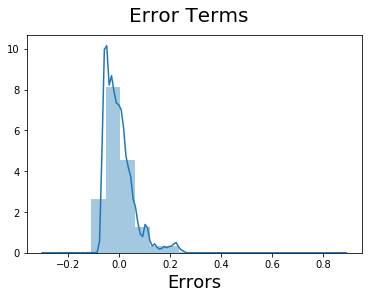

In [69]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [70]:
#fitting test data
df_test[varlist] = scaler.transform(df_test[varlist])

In [71]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [72]:
# Let's check the list 'col2' which had the 10 variables RFE had selected
X_test_rfe6 = X_test[col1]

In [73]:
col1

Index(['units', 'gmvperunit', 'Total Investment', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', 'SEM', 'Radio',
       'Other', 'Affiliates'],
      dtype='object')

In [74]:
#Let's now drop the variables we had manually eliminated as well
X_test_rfe6 = X_test_rfe6.drop(['Total Investment','Radio','TV','Online marketing','Affiliates'], axis = 1)

In [75]:
# Add a constant to the test set created
X_test_rfe6 = sm.add_constant(X_test_rfe6)
X_test_rfe6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27593 entries, 104910 to 84613
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   const              27593 non-null  float64
 1   units              27593 non-null  float64
 2   gmvperunit         27593 non-null  float64
 3   Digital            27593 non-null  float64
 4   Sponsorship        27593 non-null  float64
 5   Content Marketing  27593 non-null  float64
 6   SEM                27593 non-null  float64
 7   Other              27593 non-null  float64
dtypes: float64(8)
memory usage: 1.9 MB


In [76]:
# Making predictions
y_pred = lm6.predict(X_test_rfe6)

Text(0, 0.5, 'y_pred')

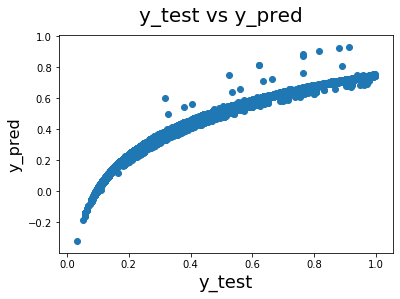

In [77]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [78]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9137961149007855

In [79]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

print(rmse)

0.056875111645791086


In [80]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import numpy as np
regr = LinearRegression()

In [81]:
scores = cross_val_score(regr, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print(scores, np.mean(scores), np.std(scores))

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(regr, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold


#If this is good, continue to fit the model on the data


regr.fit(X_train, y_train)

y_hat = regr.predict(X_test)      #this gives me my predictions

regr.score(X_test, y_test)

[-1.56044978e+10  9.21192943e-01  9.23551621e-01 -9.04195780e+15
 -2.15644237e+13] -1812707566145598.5 3614634762336806.5


0.9230931141913572

In [82]:
accuracy

-42792352134878.77

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [84]:
folds=KFold(n_splits=5, shuffle=True, random_state=100)
scores=cross_val_score(lm,X_train,y_train,scoring='r2',cv=folds)
scores

array([ 9.22066803e-01, -7.54712183e+11,  9.22021868e-01,  9.23797470e-01,
       -1.98136375e+09])

In [85]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.9222280091480913
0.0


In [ ]:
from scipy.stats import uniform as sp_rand
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = Lasso()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_train, y_train)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [ ]:
# model with optimal alpha
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

In [ ]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))